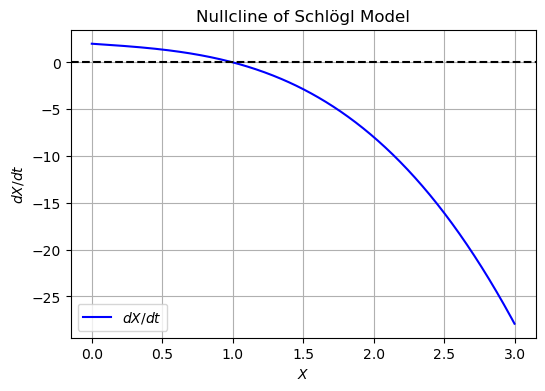

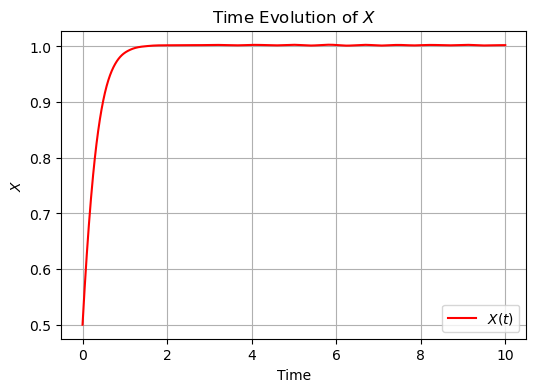

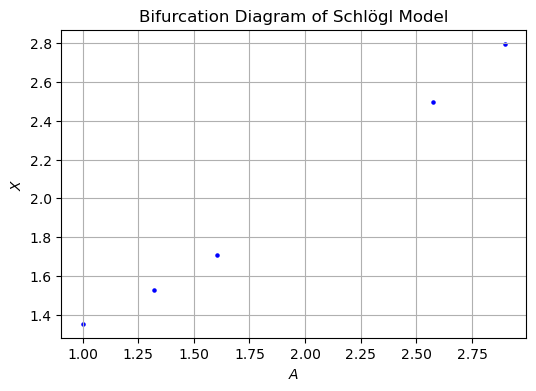

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def schlogl_rhs(t, X, k1, k2, k3, k4, A, B):
    return k1 * A * X**2 - k2 * X**3 - k3 * X + k4 * B

def plot_nullcline(k1, k2, k3, k4, A, B):
    X = np.linspace(0, 3, 400)
    dXdt = k1 * A * X**2 - k2 * X**3 - k3 * X + k4 * B
    
    plt.figure(figsize=(6, 4))
    plt.plot(X, dXdt, label='$dX/dt$', color='b')
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('$X$')
    plt.ylabel('$dX/dt$')
    plt.title('Nullcline of Schlögl Model')
    plt.legend()
    plt.grid()
    plt.show()

def simulate_time_evolution(k1, k2, k3, k4, A, B, X0, tmax=10):
    t_span = (0, tmax)
    t_eval = np.linspace(0, tmax, 1000)
    sol = solve_ivp(schlogl_rhs, t_span, [X0], args=(k1, k2, k3, k4, A, B), t_eval=t_eval)
    
    plt.figure(figsize=(6, 4))
    plt.plot(sol.t, sol.y[0], label='$X(t)$', color='r')
    plt.xlabel('Time')
    plt.ylabel('$X$')
    plt.title('Time Evolution of $X$')
    plt.legend()
    plt.grid()
    plt.show()

def bifurcation_diagram(k1, k2, k3, k4, A_range, B):
    steady_states = []
    A_vals = np.linspace(A_range[0], A_range[1], 100)
    
    for A in A_vals:
        X = np.linspace(0, 3, 400)
        dXdt = k1 * A * X**2 - k2 * X**3 - k3 * X + k4 * B
        zero_crossings = X[np.abs(dXdt) < 1e-3]
        steady_states.append(zero_crossings)
    
    plt.figure(figsize=(6, 4))
    for i, A in enumerate(A_vals):
        plt.scatter([A] * len(steady_states[i]), steady_states[i], color='b', s=5)
    
    plt.xlabel('$A$')
    plt.ylabel('$X$')
    plt.title('Bifurcation Diagram of Schlögl Model')
    plt.grid()
    plt.show()

# Parameters for bistability
k1, k2, k3, k4 = 1.0, 1.0, 1.0, 1.0
A, B = 0.01, 2.0
X0 = 0.5

# Plot the nullcline
plot_nullcline(k1, k2, k3, k4, A, B)

# Simulate time evolution
simulate_time_evolution(k1, k2, k3, k4, A, B, X0)

# Bifurcation analysis
bifurcation_diagram(k1, k2, k3, k4, (1.0, 5.0), B)
